## 1. Import Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

## 2. Load Data using Tensorflow API

In [ ]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print("Training set:", x_train.shape, y_train.shape)
print("Test set:", x_test.shape, y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Training set: (60000, 28, 28) (60000,)
Test set: (10000, 28, 28) (10000,)


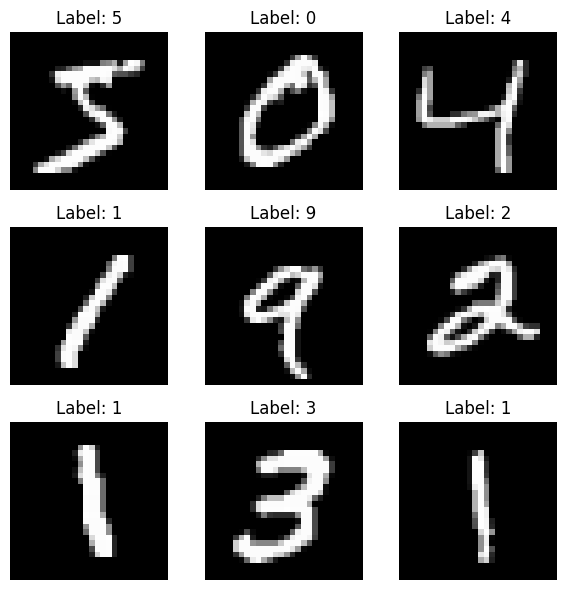

In [4]:
# Plot the first 9 images from the training set
plt.figure(figsize=(6,6))
for i in range(9):
    # define subplot (3x3 grid)
    plt.subplot(3, 3, i + 1)
    # plot raw pixel data
    plt.imshow(x_train[i], cmap='gray')
    # show the corresponding label as title
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

# show the figure
plt.tight_layout()
plt.show()

## 3. Data Preprocessing

In [5]:
#Normalize pixel values (0–255 → 0–1)

x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

In [6]:
#Split training and validation data
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    x_train,  y_train, test_size=0.1, random_state=42
)

print("Training set:", X_train.shape)
print("Validation set:", X_val.shape)
print("Test set:", x_test.shape)

Training set: (54000, 28, 28)
Validation set: (6000, 28, 28)
Test set: (10000, 28, 28)


## 4. Model Definition and Compilation

In [7]:
# Define the model
model = keras.Sequential([
    layers.Input(shape=(28, 28)),
    layers.Reshape((28, 28, 1)),
    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## 5. Model Training

In [8]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=128,
    validation_data=(X_val, y_val)
)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8432 - loss: 0.5277 - val_accuracy: 0.9790 - val_loss: 0.0707
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9811 - loss: 0.0623 - val_accuracy: 0.9867 - val_loss: 0.0445
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9881 - loss: 0.0395 - val_accuracy: 0.9875 - val_loss: 0.0456
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9911 - loss: 0.0286 - val_accuracy: 0.9897 - val_loss: 0.0358
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9932 - loss: 0.0223 - val_accuracy: 0.9890 - val_loss: 0.0354
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9949 - loss: 0.0168 - val_accuracy: 0.9882 - val_loss: 0.0378
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9960 - loss: 0.0134 - val_accuracy: 0.9888 - val_loss: 0.0380
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9967 - loss: 0.0100 - val_accuracy: 0

## 6. Ploting accuracy and loss 

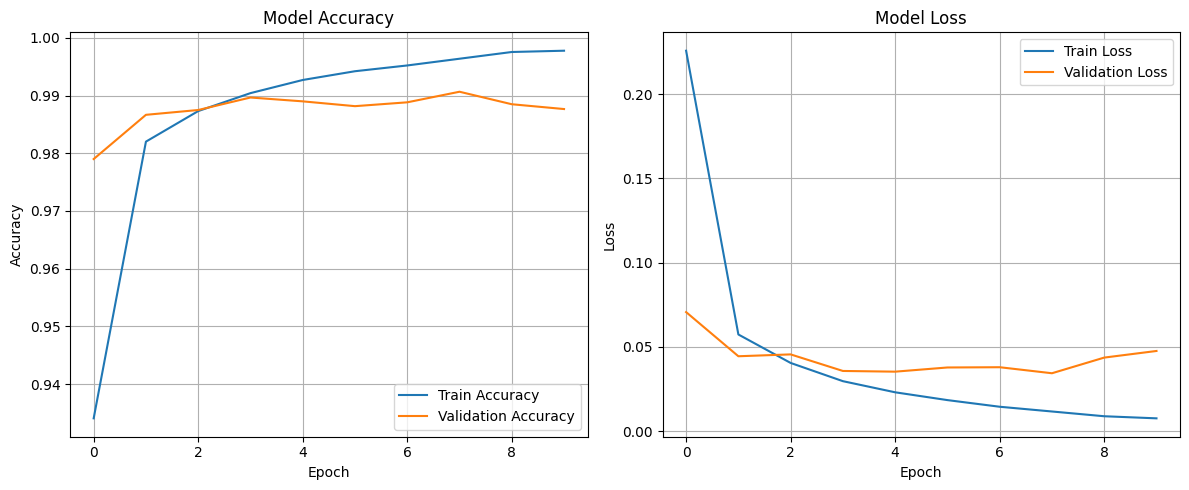

In [9]:
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)

plt.tight_layout()
plt.show()

## 7. Evaluation

In [10]:
# Evaluate on the test set
print("\nMODEL EVALUATION:")
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'test set accuracy: {test_accuracy}')
print(f'test set loss: {test_loss}')


MODEL EVALUATION:
test set accuracy: 0.9865999817848206
test set loss: 0.04767540842294693
